In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Supervised learning

# 1.1. Generalized Linear Models:

1. Used for regression

2. Target value is a linear combination of the input variables

$$ \hat{y}(\omega,x)=\omega_0+\omega_1 x_1+ ... + \omega_n x_n $$

## 1.1.1. Linear Regression aka Ordinary Least Squares

$$ {\min_{\omega} \|X\omega - y \|_2}^2 $$

<span style="color:blue"> class </span>       ``sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)``

### Example 1:

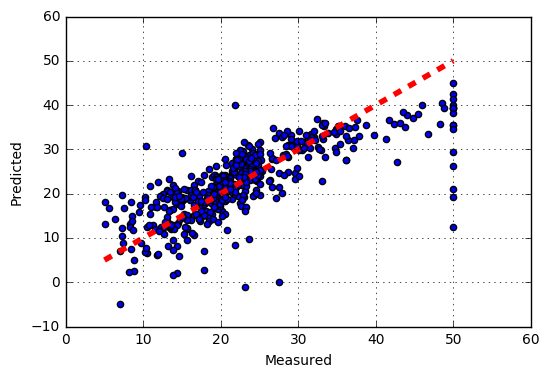

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
boston = load_boston()
y = boston.target

predicted = cross_val_predict(lr, boston.data, y, cv=10)
plt.scatter(y,predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.grid()

### Example 2

Coefficient of LinearRegression:  [ 938.23786125]
Intercept:  152.918861826
Mean Sauared Error:  2548.07239873
Coeficient of Determination(R^2):  0.472575447982


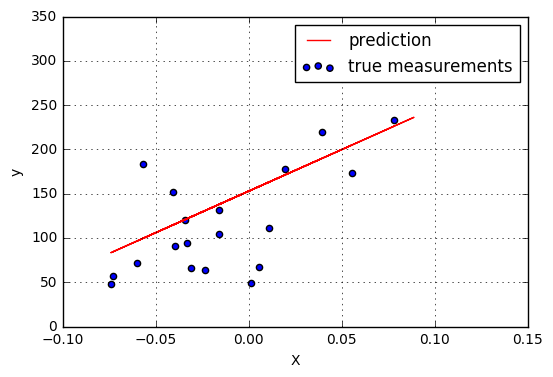

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data[:,2].reshape(-1,1)
y = diabetes.target
X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]
lr = LinearRegression()
lr.fit(X_train, y_train)
print 'Coefficient of LinearRegression: ', lr.coef_
print 'Intercept: ', lr.intercept_
y_pred = lr.predict(X_test)
print 'Mean Sauared Error: ', mean_squared_error(y_test, y_pred)
print 'Coeficient of Determination(R^2): ', lr.score(X_test, y_test)
plt.scatter(X_test, y_test, label='true measurements')
plt.plot(X_test, y_pred, 'r', label= 'prediction')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

## 1.1.2. Ridge Regression

1. An $l_2$ norm penalty is added to control the model complexity ($l_2$ regularization). Here, we make sure that in addition to fitting the data (similar to ordinary least square), the magnitude of $\omega$ remains as small as possible (i.e. it ensures that the effect of each feature on outcome is as small as possible. Therefore, we can avoid overfitting).  

2. It has a closed form solution (i.e. analytical solution exists). Therefore, it is computationally stable.  

$$ {\min_{\omega} \|X\omega - y \|_2}^2 + \alpha {\|\omega\|_2}^2,\quad \alpha \geqslant 0$$

<span style="color:blue"> class </span> sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)


### Example 1:

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Training score is 0.744549154925 and test score is 0.711605962621
Best alpha is : 0.01
Coefficients:  [ -1.58406787e-01   6.01232677e-02  -1.09418218e-02   3.47130738e+00
  -1.19102053e+01   3.57193860e+00  -6.15031821e-05  -1.51184988e+00
   3.46406087e-01  -1.38266133e-02  -8.62529839e-01   8.13938461e-03
  -5.69039536e-01]


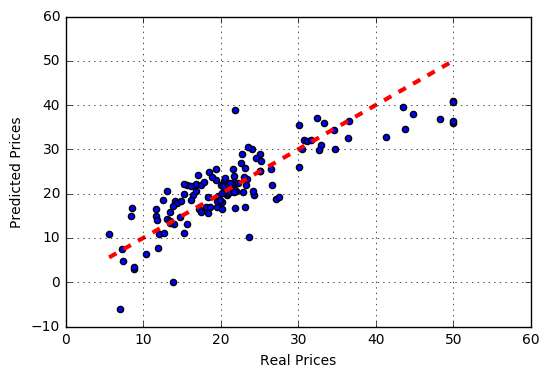

In [4]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 1, 6)}
model = GridSearchCV(ridge, param_grid=param_grid)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
print 'Training score is {train} and test score is {test}'.format(train=train_score , test= test_score)
print 'Best alpha is :', model.best_params_['alpha']
print 'Coefficients: ', model.best_estimator_.coef_
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw='3')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.grid()

### Example 2

alpha = 0.0001 	 coefficient is 938.139697014  	 and MSE is 2548.184
alpha = 0.001 	 coefficient is 937.257142359  	 and MSE is 2549.189
alpha = 0.01 	 coefficient is 928.522073575  	 and MSE is 2559.321
alpha = 0.1 	 coefficient is 849.362965656  	 and MSE is 2666.589
alpha = 1.0 	 coefficient is 458.488594672  	 and MSE is 3604.27
alpha = 10.0 	 coefficient is 81.8441575712  	 and MSE is 5149.792
alpha = 0 	 coefficient is 938.237861251  	 and MSE is 2548.072


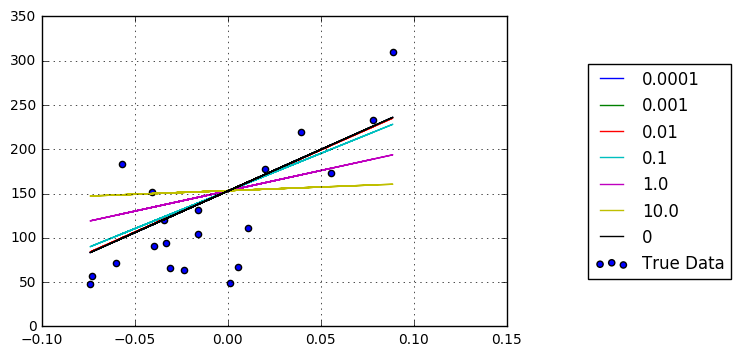

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data[:,2].reshape(-1,1)
y = diabetes.target
X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]
plt.scatter(X_test, y_test, label='True Data')
alphas = list(np.logspace(-4, 1, 6))
alphas.append(0)
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    plt.plot(X_test,y_pred,  label= str(a))
    print 'alpha = {alpha} \t coefficient is {coef}  \t and MSE is {MSE}'.format(
        alpha=a,coef=ridge.coef_[0], MSE= round(mean_squared_error(y_test, y_pred),3))
    
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center right', ncol=1)
plt.grid()

## 1.1.3. Lasso

1. An $l_1$ norm penalty is added to control the model complexity ($l_1$ regularization). Similar to Ridge, we want to keep the magnitude of $\omega$ as small as possible (This ensures that the effect of each feature on outcome is as small as possible. Therefore, we avoid overfitting). 

2. It does not have a close form solution (i.e. numerical techniques are required). The Lasso implementation in sklearn uses coordinate descent as the algorithm to fit the coefficients. 

3. In lasso, the ceofficients ($\omega$) can be exactly zero (i.e. the model ignores these feature completely). This can be used as a feature selection tool.

$$ {\min_{\omega} \frac{1}{2 n_{smaple}} \|X\omega - y \|_2}^2 + \alpha {\|\omega\|_1}$$

<span style="color:blue"> class </span> sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

### Example 1

Training score is 0.744549526743 and test score is 0.711737674856
Best alpha is : 0.0001
Coefficients:  [ -1.58433236e-01   6.01111938e-02  -1.06299629e-02   3.46996481e+00
  -1.19844540e+01   3.57157477e+00   8.93213252e-07  -1.51303031e+00
   3.46567896e-01  -1.38209325e-02  -8.63271075e-01   8.13536466e-03
  -5.68939486e-01]


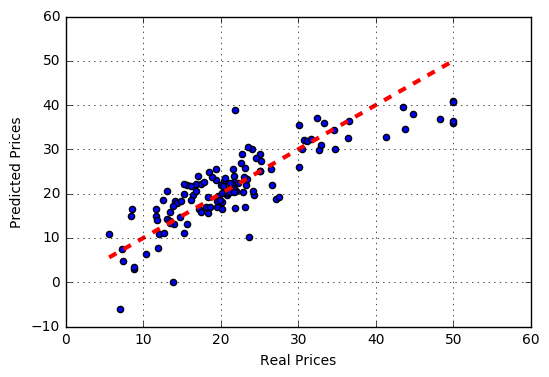

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
lasso = Lasso()
param_grid = {'alpha': np.logspace(-4, 1, 6)}
model = GridSearchCV(lasso, param_grid=param_grid)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
print 'Training score is {train} and test score is {test}'.format(train=train_score , test= test_score)
print 'Best alpha is :', model.best_params_['alpha']
print 'Coefficients: ', model.best_estimator_.coef_
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw='3')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.grid()

### Example 2

alpha = 0.0001 	 coefficient is 938.193704386  	 and MSE is 2548.123
alpha = 0.001 	 coefficient is 937.7962926  	 and MSE is 2548.575
alpha = 0.01 	 coefficient is 933.822174736  	 and MSE is 2553.133
alpha = 0.1 	 coefficient is 894.080996097  	 and MSE is 2602.572
alpha = 1.0 	 coefficient is 496.66920971  	 and MSE is 3482.772
alpha = 10.0 	 coefficient is 0.0  	 and MSE is 5568.965


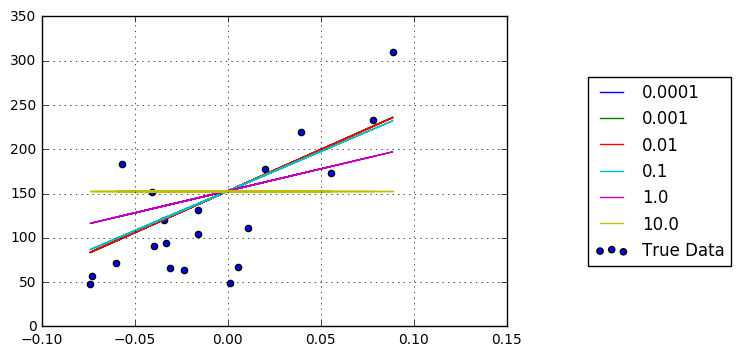

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data[:,2].reshape(-1,1)
y = diabetes.target
X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]
plt.scatter(X_test, y_test, label='True Data')
alphas = list(np.logspace(-4, 1, 6))
for a in alphas:
    lasso = Lasso(alpha = a, max_iter=5000)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    plt.plot(X_test,y_pred,  label= str(a))
    print 'alpha = {alpha} \t coefficient is {coef}  \t and MSE is {MSE}'.format(
        alpha=a,coef=lasso.coef_[0], MSE= round(mean_squared_error(y_test, y_pred),3))
    
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center right', ncol=1)
plt.grid()

**Note:** Since Ridge has a closed solution and it handles the overfitting issues, it is usually the prefered choice. However, in cases that we have a lot of features and we are not sure if these feature are important, Lasso could be the appropriate model. 

### Example 3

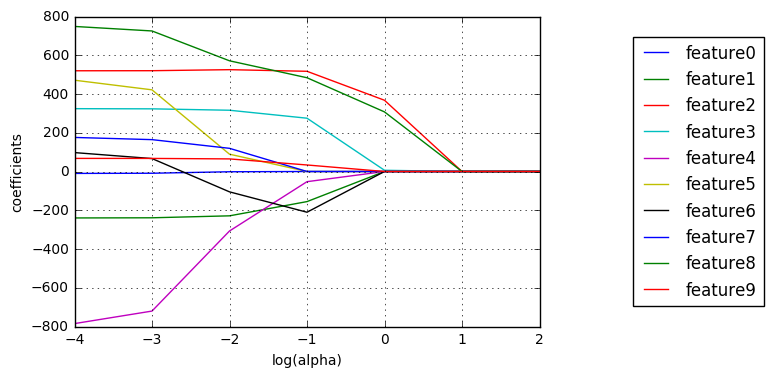

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import lasso_path
from sklearn.cross_validation import train_test_split

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
alphas, coef_path, _ = lasso_path(X, y, alphas=list(np.logspace(-4, 2, 7)))

for i,coefs in enumerate(coef_path):
    plt.plot(np.log10(alphas), coefs, label='feature'+ str(i))
plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='center right')
plt.grid()

The above plot shows that as the value of the $\alpha$ increases the magnitude of $\omega$ drops (i.e. more regularization).  

### 1.1.3.1. Setting regularization parameter

In the first example, the optimum value of $\alpha$ for lasso was found using a GridSearchCV. sklearn has more efficient methods to set the optimum $\alpha$ for lasso. 

#### 1.1.3.1.1. Using cross-validation

#### a. LassoCV

<span style="color:blue"> class </span> sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False, random_state=None, selection='cyclic')

The value of alpha is:  0.703195413566
Training score:  0.707883799843
Test score:  0.669482638017


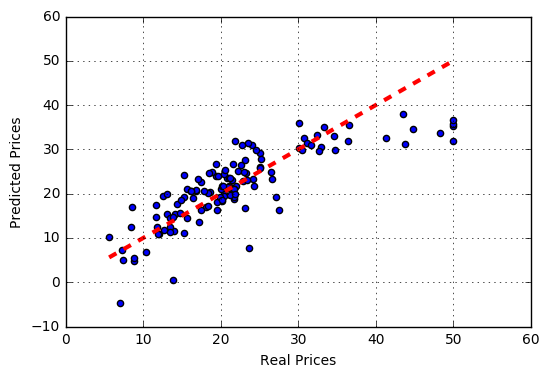

In [9]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

lasso_cv = LassoCV(random_state=13)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
print 'The value of alpha is: ', lasso_cv.alpha_
print 'Training score: ', lasso_cv.score(X_train, y_train)
print 'Test score: ', lasso_cv.score(X_test, y_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw='3')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.grid()

#### b. LassoLarsCV

<span style="color:blue"> class </span> sklearn.linear_model.LassoLarsCV(fit_intercept=True, verbose=False, max_iter=500, normalize=True, precompute='auto', cv=None, max_n_alphas=1000, n_jobs=1, eps=2.2204460492503131e-16, copy_X=True, positive=False)

The value of alpha is:  0.00307417916033
Training score:  0.742664580139
Test score:  0.714868571293


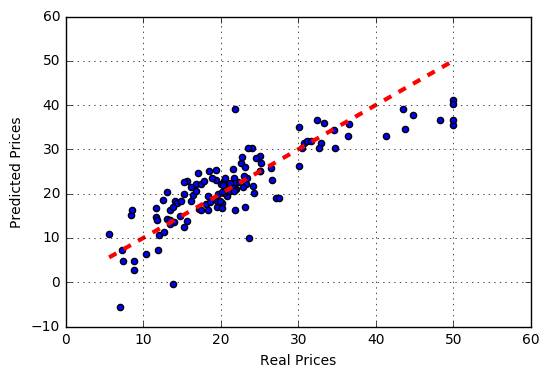

In [10]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLarsCV
from sklearn.cross_validation import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

lassoLars_cv = LassoLarsCV()
lassoLars_cv.fit(X_train, y_train)
y_pred = lassoLars_cv.predict(X_test)
print 'The value of alpha is: ', lassoLars_cv.alpha_
print 'Training score: ', lassoLars_cv.score(X_train, y_train)
print 'Test score: ', lassoLars_cv.score(X_test, y_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw='3')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.grid()

**Note:** According to sklearn document, for high-dimensional datasets with many collinear regressors, `LassoCV` is most often preferable. However, `LassoLarsCV` has the advantage of exploring more relevant values of $\alpha$ parameter, and if the number of samples is very small compared to the number of observations, it is often faster than `LassoCV`.

#### 1.1.3.1.2. Information-criteria based model selection

<span style="color:blue"> class </span>  sklearn.linear_model.LassoLarsIC(criterion='aic', fit_intercept=True, verbose=False, normalize=True, precompute='auto', max_iter=500, eps=2.2204460492503131e-16, copy_X=True, positive=False)

Two criterions are available: the Akaike information criterion (AIC) and the Bayes Information criterion (BIC).

**Note:** Information-criterion based model selection is very fast, but it relies on a proper estimation of degrees of freedom. Also, they are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples)

BIC criterion
The value of alpha is:  8.79628573091e-06
Training score:  0.744549554325
Test score:  0.71180384459


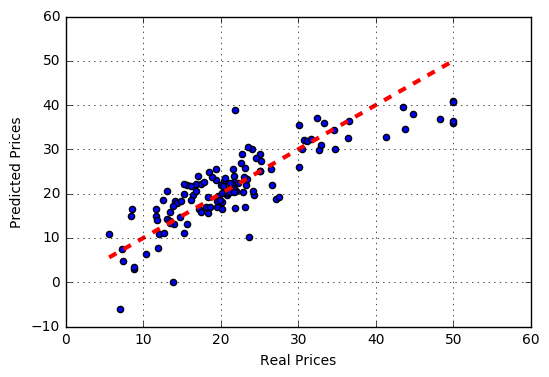

In [17]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLarsIC
from sklearn.cross_validation import train_test_split

boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

lassoLars_IC = LassoLarsIC(criterion='bic')
lassoLars_IC.fit(X_train, y_train)
y_pred = lassoLars_IC.predict(X_test)
print 'BIC criterion'
print 'The value of alpha is: ', lassoLars_IC.alpha_
print 'Training score: ', lassoLars_IC.score(X_train, y_train)
print 'Test score: ', lassoLars_IC.score(X_test, y_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw='3')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.grid()

## Elastic Net:

1. A linear combination of the $l_1$ and $l_2$ norm is added as the regulization to the ordinary least square. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge


$$ \hat{\gamma} = {\operatorname*{arg\,min}_\omega (\frac{1}{2 n_{smaple}} \|X\omega - y \|_2}^2 + \lambda_1 {\|\omega\|_1} + \lambda_2 {\|\omega\|_2}^2)  \quad where \quad \lambda_1 = \alpha * \rho \quad and \quad \lambda_2=\frac{\alpha(1-\rho)}{2}$$

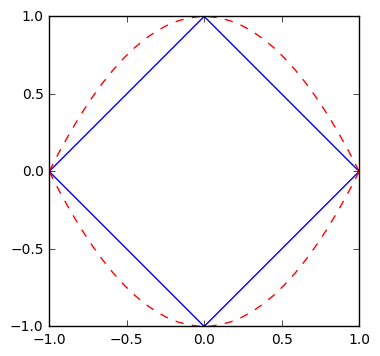

In [24]:
plt.figure(figsize=(4,4))
plt.plot([0,1,0,-1,0],[1,0,-1,0,1])
x = np.linspace(-1,1,30)
plt.plot(x, 1-x*x, 'r--')
plt.plot(x, x*x-1, 'r--')